In [226]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Optimizer
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint

In [227]:
train=pd.read_csv("veriler\datathon\\train.csv")
sample=pd.read_csv("veriler\datathon\\sample_solution.csv")
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [228]:
sutunisimler=["tarih","urun","besin","kategori","fiyat","uretimyeri","market","sehir"]
train.columns=sutunisimler

In [229]:
tarih2016=train.iloc[:45503,:]
tarih2017=train.iloc[45504:91008,:]
tarih2018=train.iloc[91008:136512,:]
tarih2019=train.iloc[136512:182016,:]
tarih2020=train.iloc[182016:,:]

In [230]:
one_hot = pd.get_dummies(tarih2016[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2016 = tarih2016.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2016 = tarih2016.join(one_hot)
tarih2016.rename(columns={'tarih_2016-01-01': 'ocak', 'tarih_2016-02-01': 'subat', 'tarih_2016-03-01': 'mart'
                         , 'tarih_2016-04-01': 'nisan', 'tarih_2016-05-01': 'mayis', 'tarih_2016-06-01': 'haziran'
                         , 'tarih_2016-07-01': 'temmuz', 'tarih_2016-08-01': 'agustos', 'tarih_2016-09-01': 'eylul'
                         , 'tarih_2016-10-01': 'ekim', 'tarih_2016-11-01': 'kasim', 'tarih_2016-12-01': 'aralik'}, inplace=True)

In [231]:
one_hot = pd.get_dummies(tarih2017[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2017 = tarih2017.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2017 = tarih2017.join(one_hot)
tarih2017.rename(columns={'tarih_2017-01-01': 'ocak', 'tarih_2017-02-01': 'subat', 'tarih_2017-03-01': 'mart'
                         , 'tarih_2017-04-01': 'nisan', 'tarih_2017-05-01': 'mayis', 'tarih_2017-06-01': 'haziran'
                         , 'tarih_2017-07-01': 'temmuz', 'tarih_2017-08-01': 'agustos', 'tarih_2017-09-01': 'eylul'
                         , 'tarih_2017-10-01': 'ekim', 'tarih_2017-11-01': 'kasim', 'tarih_2017-12-01': 'aralik'}, inplace=True)

In [232]:
one_hot = pd.get_dummies(tarih2018[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2018 = tarih2018.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2018 = tarih2018.join(one_hot)
tarih2018.rename(columns={'tarih_2018-01-01': 'ocak', 'tarih_2018-02-01': 'subat', 'tarih_2018-03-01': 'mart'
                         , 'tarih_2018-04-01': 'nisan', 'tarih_2018-05-01': 'mayis', 'tarih_2018-06-01': 'haziran'
                         , 'tarih_2018-07-01': 'temmuz', 'tarih_2018-08-01': 'agustos', 'tarih_2018-09-01': 'eylul'
                         , 'tarih_2018-10-01': 'ekim', 'tarih_2018-11-01': 'kasim', 'tarih_2018-12-01': 'aralik'}, inplace=True)

In [233]:
one_hot = pd.get_dummies(tarih2019[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2019 = tarih2019.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2019 = tarih2019.join(one_hot)
tarih2019.rename(columns={'tarih_2019-01-01': 'ocak', 'tarih_2019-02-01': 'subat', 'tarih_2019-03-01': 'mart'
                         , 'tarih_2019-04-01': 'nisan', 'tarih_2019-05-01': 'mayis', 'tarih_2019-06-01': 'haziran'
                         , 'tarih_2019-07-01': 'temmuz', 'tarih_2019-08-01': 'agustos', 'tarih_2019-09-01': 'eylul'
                         , 'tarih_2019-10-01': 'ekim', 'tarih_2019-11-01': 'kasim', 'tarih_2019-12-01': 'aralik'}, inplace=True)

In [234]:
one_hot = pd.get_dummies(tarih2020[['tarih','urun','kategori','uretimyeri','market','sehir']])
tarih2020 = tarih2020.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

tarih2020 = tarih2020.join(one_hot)
tarih2020.rename(columns={'tarih_2020-01-01': 'ocak', 'tarih_2020-02-01': 'subat', 'tarih_2020-03-01': 'mart'
                         , 'tarih_2020-04-01': 'nisan', 'tarih_2020-05-01': 'mayis', 'tarih_2020-06-01': 'haziran'
                         , 'tarih_2020-07-01': 'temmuz', 'tarih_2020-08-01': 'agustos', 'tarih_2020-09-01': 'eylul'
                         , 'tarih_2020-10-01': 'ekim', 'tarih_2020-11-01': 'kasim', 'tarih_2020-12-01': 'aralik'}, inplace=True)

In [235]:
tarih2016["yil"]=1
tarih2017["yil"]=2
tarih2018["yil"]=3
tarih2019["yil"]=4
tarih2020["yil"]=5

In [236]:
frames = [tarih2016, tarih2017, tarih2018,tarih2019,tarih2020]
result = pd.concat(frames)

In [237]:
result.head()

,fiyat,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,...,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H,yil
0,33.41,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,11.22,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,11.12,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,7.02,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,13.14,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1


In [238]:
result.isnull().sum()

fiyat      0
ocak       0
subat      0
mart       0
nisan      0
          ..
sehir_E    0
sehir_F    0
sehir_G    0
sehir_H    0
yil        0
Length: 112, dtype: int64

In [239]:
y=result.iloc[:,0:1]
x=result.drop(['fiyat'],axis = 1)

In [240]:
model=Sequential()
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(1))

In [241]:
model.compile(optimizer="Adam",loss="mse")

In [242]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [243]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [244]:
model.fit(x_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
4288/4288 [==============================] - 21s 5ms/step - loss: 5.7448 - val_loss: 2.0270
Epoch 2/50
4288/4288 [==============================] - 24s 6ms/step - loss: 2.3438 - val_loss: 2.0419
Epoch 3/50
4288/4288 [==============================] - 24s 6ms/step - loss: 1.9374 - val_loss: 1.4853
Epoch 4/50
4288/4288 [==============================] - 24s 6ms/step - loss: 1.6351 - val_loss: 1.5297
Epoch 5/50
4288/4288 [==============================] - 24s 6ms/step - loss: 1.2988 - val_loss: 1.6324
Epoch 6/50
4288/4288 [==============================] - 24s 5ms/step - loss: 1.0463 - val_loss: 1.1280
Epoch 7/50
4288/4288 [==============================] - 24s 6ms/step - loss: 0.8866 - val_loss: 0.7688
Epoch 8/50
4288/4288 [==============================] - 23s 5ms/step - loss: 0.7529 - val_loss: 1.0831
Epoch 9/50
4288/4288 [==============================] - 24s 6ms/step - loss: 0.6810 - val_loss: 0.5687
Epoch 10/50
4288/4288 [==============================] - 23s 5ms/step - l

<AxesSubplot:>

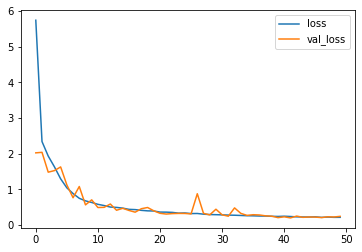

In [245]:
history=pd.DataFrame(model.history.history)
history.plot()

In [246]:
model.evaluate(x_test,y_test)

2347/2347 [==============================] - 6s 3ms/step - loss: 0.2629


0.2628852427005768

In [247]:
model.save('veriler\datathon\models\\datathon11')

INFO:tensorflow:Assets written to: veriler\datathon\models\datathon11\assets


In [248]:
new_model = tf.keras.models.load_model('veriler\datathon\models\\datathon11')

In [249]:
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [250]:
test=test.drop('id',axis=1)

In [251]:
sutunisimler=["tarih","urun","besin","kategori","uretimyeri","market","sehir"]
test.columns=sutunisimler

In [252]:
test.head()

,tarih,urun,besin,kategori,uretimyeri,market,sehir
0,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,2021-01-01,hindi,160,et,Yurt içi,M,A
3,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A


In [253]:
one_hot = pd.get_dummies(test[['tarih','urun','kategori','uretimyeri','market','sehir']])
test = test.drop(['tarih','urun','kategori','uretimyeri','market','sehir','besin'],axis = 1)

test = test.join(one_hot)
test.rename(columns={'tarih_2021-01-01': 'ocak', 'tarih_2021-02-01': 'subat', 'tarih_2021-03-01': 'mart'
                        , 'tarih_2021-04-01': 'nisan', 'tarih_2021-05-01': 'mayis', 'tarih_2021-06-01': 'haziran'
                        , 'tarih_2021-07-01': 'temmuz', 'tarih_2021-08-01': 'agustos', 'tarih_2021-09-01': 'eylul'
                        , 'tarih_2021-10-01': 'ekim', 'tarih_2021-11-01': 'kasim', 'tarih_2021-12-01': 'aralik'}, inplace=True)

In [254]:
test["yil"]=6

In [255]:
test.head()

,ocak,subat,mart,nisan,mayis,haziran,temmuz,agustos,eylul,ekim,...,market_M,sehir_A,sehir_B,sehir_C,sehir_D,sehir_E,sehir_F,sehir_G,sehir_H,yil
0,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
1,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
3,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6
4,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,6


In [256]:
scaler =StandardScaler()
scaler.fit(test)
test = scaler.transform(test)

In [257]:
test[0]

array([ 3.31662479, -0.30151134, -0.30151134, -0.30151134, -0.30151134,
       -0.30151134, -0.30151134, -0.30151134, -0.30151134, -0.30151134,
       -0.30151134, -0.30151134, -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 ,
       -0.1132277 , -0.1132277 , -0.1132277 , -0.1132277 , -0.11

In [258]:
testTahminleri=new_model.predict(test)
len(testTahminleri)

45504

In [259]:
testTahminleri= pd.Series(testTahminleri.reshape(45504))

In [260]:
testTahminleri.to_csv('veriler\datathon\sonuclar\\datahton112.csv')

In [261]:
deneme=pd.read_csv('veriler\datathon\sonuclar\\datahton112.csv')

In [262]:
sutunisimler=["id","ürün fiyatı"]
deneme.columns=sutunisimler

In [263]:
deneme.to_csv('veriler\datathon\sonuclar\\datahton1.csv',index=False)

array([[0.29695431, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.13959391, 1.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.04822335, 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.23350254, 0.        , 0.        , ..., 0.        , 0.        ,
        0.25      ],
       [0.28426396, 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.96954315, 0.        , 0.        , ..., 1.        , 0.        ,
        0.75      ]])

In [75]:
testTahminleri=model.predict(x_test)
len(testTahminleri)

75082

In [76]:
tahmin=pd.DataFrame(y_test.values)
testTahminleri= pd.Series(testTahminleri.reshape(75082,))
tahminDf=pd.concat([tahmin,testTahminleri],axis=1)
tahminDf.columns=["Gerçek Değer","Test Sonucu"]

In [77]:
tahminDf.head(20)

,Gerçek Değer,Test Sonucu
0,30.59,31.099083
1,15.06,14.833785
2,3.52,3.909066
3,9.42,8.866530
4,27.98,29.246479
5,26.99,26.784340
6,18.79,17.975403
7,22.17,22.066883
8,20.81,21.429928
9,22.55,21.603722


In [264]:
train=pd.read_csv("veriler\datathon\\train.csv")

In [265]:
test=pd.read_csv("veriler\datathon\\testFeatures.csv")

In [266]:
test=test.drop("id",axis=1)

In [268]:
fiyat2021=pd.read_csv("veriler\datathon\sonuclar\\datahton1.csv")

In [269]:
fiyat2021=fiyat2021.drop("id",axis=1)

In [270]:
veri=pd.read_csv("veriler\datathon\\train.csv")

In [271]:
veri2016=train.iloc[:45503,:]
veri2017=train.iloc[45504:91008,:]
veri2018=train.iloc[91008:136512,:]
veri2019=train.iloc[136512:182016,:]
veri2020=train.iloc[182016:,:]

In [272]:
veri2021=pd.concat([fiyat2021,test],axis=1)

In [273]:
veri2021

,ürün fiyatı,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün üretim yeri,market,şehir
0,48.902714,2021-01-01,kıyma,120,et,Yurt içi,M,A
1,18.215190,2021-01-01,tavuk,103,et,Yurt içi,M,A
2,18.284628,2021-01-01,hindi,160,et,Yurt içi,M,A
3,10.218770,2021-01-01,Bakla-kuru,354,sebze ve bakliyat,Yurt içi,M,A
4,19.060265,2021-01-01,Bakla-taze,72,sebze ve bakliyat,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45499,31.548893,2021-12-01,fındık,110,kuruyemiş,Yurt dışı,B,H
45500,32.071003,2021-12-01,fıstık,115,kuruyemiş,Yurt dışı,B,H
45501,33.893677,2021-12-01,kaju,100,kuruyemiş,Yurt dışı,B,H
45502,31.257967,2021-12-01,badem,110,kuruyemiş,Yurt dışı,B,H


In [210]:
veri2020

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
182016,2020-01-01,kıyma,120,et,88.52,Yurt içi,M,A
182017,2020-01-01,tavuk,103,et,30.77,Yurt içi,M,A
182018,2020-01-01,hindi,160,et,32.45,Yurt içi,M,A
182019,2020-01-01,Bakla-kuru,354,sebze ve bakliyat,18.04,Yurt içi,M,A
182020,2020-01-01,Bakla-taze,72,sebze ve bakliyat,32.24,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
227515,2020-12-01,fındık,110,kuruyemiş,51.19,Yurt dışı,B,H
227516,2020-12-01,fıstık,115,kuruyemiş,55.14,Yurt dışı,B,H
227517,2020-12-01,kaju,100,kuruyemiş,58.60,Yurt dışı,B,H
227518,2020-12-01,badem,110,kuruyemiş,51.83,Yurt dışı,B,H


In [212]:
veri2019

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
136512,2019-01-01,kıyma,120,et,69.75,Yurt içi,M,A
136513,2019-01-01,tavuk,103,et,25.64,Yurt içi,M,A
136514,2019-01-01,hindi,160,et,26.70,Yurt içi,M,A
136515,2019-01-01,Bakla-kuru,354,sebze ve bakliyat,14.52,Yurt içi,M,A
136516,2019-01-01,Bakla-taze,72,sebze ve bakliyat,25.40,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
182011,2019-12-01,fındık,110,kuruyemiş,41.63,Yurt dışı,B,H
182012,2019-12-01,fıstık,115,kuruyemiş,41.95,Yurt dışı,B,H
182013,2019-12-01,kaju,100,kuruyemiş,43.78,Yurt dışı,B,H
182014,2019-12-01,badem,110,kuruyemiş,37.68,Yurt dışı,B,H


In [213]:
veri2018

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
91008,2018-01-01,kıyma,120,et,48.24,Yurt içi,M,A
91009,2018-01-01,tavuk,103,et,18.43,Yurt içi,M,A
91010,2018-01-01,hindi,160,et,17.99,Yurt içi,M,A
91011,2018-01-01,Bakla-kuru,354,sebze ve bakliyat,10.17,Yurt içi,M,A
91012,2018-01-01,Bakla-taze,72,sebze ve bakliyat,19.52,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
136507,2018-12-01,fındık,110,kuruyemiş,32.06,Yurt dışı,B,H
136508,2018-12-01,fıstık,115,kuruyemiş,32.45,Yurt dışı,B,H
136509,2018-12-01,kaju,100,kuruyemiş,33.32,Yurt dışı,B,H
136510,2018-12-01,badem,110,kuruyemiş,31.02,Yurt dışı,B,H


In [215]:
veri2017

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
45504,2017-01-01,kıyma,120,et,40.29,Yurt içi,M,A
45505,2017-01-01,tavuk,103,et,14.32,Yurt içi,M,A
45506,2017-01-01,hindi,160,et,13.98,Yurt içi,M,A
45507,2017-01-01,Bakla-kuru,354,sebze ve bakliyat,8.30,Yurt içi,M,A
45508,2017-01-01,Bakla-taze,72,sebze ve bakliyat,15.60,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
91003,2017-12-01,fındık,110,kuruyemiş,21.76,Yurt dışı,B,H
91004,2017-12-01,fıstık,115,kuruyemiş,23.15,Yurt dışı,B,H
91005,2017-12-01,kaju,100,kuruyemiş,24.68,Yurt dışı,B,H
91006,2017-12-01,badem,110,kuruyemiş,22.65,Yurt dışı,B,H


In [216]:
veri2016

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A
...,...,...,...,...,...,...,...,...
45498,2016-12-01,Vişne,57,meyve,4.78,Yurt dışı,B,H
45499,2016-12-01,fındık,110,kuruyemiş,16.84,Yurt dışı,B,H
45500,2016-12-01,fıstık,115,kuruyemiş,17.63,Yurt dışı,B,H
45501,2016-12-01,kaju,100,kuruyemiş,19.12,Yurt dışı,B,H
